**PROJECT ON HEART_DISEASE PREDICTION**

In [ ]:
# Load the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from scipy.stats import stats
from scipy import stats

In [ ]:
# load the data set or import from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/machinelearning/heart_disease (1) (1).csv'

In [ ]:
df_hrt = pd.read_csv(path)

In [ ]:
#display first 5 entries of dataset
df_hrt.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1.0,1.0,140,289,0,1.0,172,0.0,0.0,2.0,0
1,49,0.0,2.0,160,180,0,1.0,156,0.0,1.0,1.0,1
2,37,1.0,1.0,130,283,0,2.0,98,0.0,0.0,2.0,0
3,48,0.0,0.0,138,214,0,1.0,108,1.0,1.5,1.0,1
4,54,1.0,2.0,150,195,0,1.0,122,0.0,0.0,2.0,0


In [ ]:
#display all statistical info
df_hrt.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df_hrt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
#checking missing and null values
df_hrt.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
#class distribution
print(df_hrt['HeartDisease'].value_counts())

1    508
0    410
Name: HeartDisease, dtype: int64


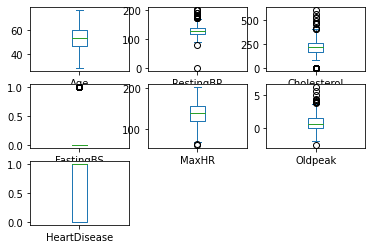

In [ ]:
#univariate plots
df_hrt.plot(kind ='box',subplots = True,layout=(3,3),sharex =False,sharey = False)
pyplot.show()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

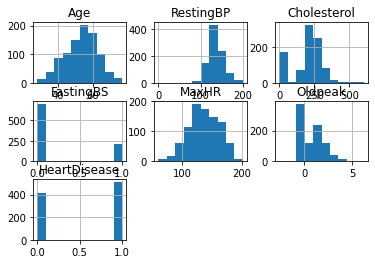

In [ ]:
df_hrt.hist()

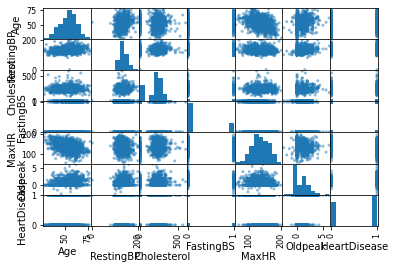

In [ ]:
#multivariate plot
from pandas.plotting import scatter_matrix
scatter_matrix(df_hrt)
pyplot.show()

In [ ]:
df_hrt.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [ ]:
# doing some feature engineering
cat_list = df_hrt.select_dtypes(include=['object']).columns.tolist()

In [ ]:
cat_list

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
#encode object dtype to float
ord_encoder = OrdinalEncoder()
df_hrt[cat_list] = ord_encoder.fit_transform(df_hrt[cat_list])

In [ ]:
df_hrt.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1.0,1.0,140,289,0,1.0,172,0.0,0.0,2.0,0
1,49,0.0,2.0,160,180,0,1.0,156,0.0,1.0,1.0,1
2,37,1.0,1.0,130,283,0,2.0,98,0.0,0.0,2.0,0
3,48,0.0,0.0,138,214,0,1.0,108,1.0,1.5,1.0,1
4,54,1.0,2.0,150,195,0,1.0,122,0.0,0.0,2.0,0


In [ ]:
df_hrt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    float64
 2   ChestPainType   918 non-null    float64
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    float64
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    float64
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    float64
 11  HeartDisease    918 non-null    int64  
dtypes: float64(6), int64(6)
memory usage: 86.2 KB


In [ ]:
#class distribution 
df_hrt['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [ ]:
x = df_hrt.iloc[:,:-1]  #2-D array as dataframe
y = df_hrt.iloc[:,-1]   #1-D array  as series

In [ ]:
#splitting the data
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
len(train_x)

734

In [ ]:
len(train_y)

734

In [ ]:
len(test_x)

184

In [ ]:
len(test_y)

184

In [ ]:
#build the logistic model
logst_regg = LogisticRegression()
logst_regg.fit(train_x,train_y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = logst_regg.predict(test_x)


In [ ]:
#test dataset
print(test_x)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
900   58  1.0            0.0        114          318          0         2.0   
570   56  1.0            0.0        128          223          0         2.0   
791   51  1.0            0.0        140          298          0         1.0   
189   53  1.0            0.0        180          285          0         2.0   
372   63  1.0            0.0        185            0          0         1.0   
..   ...  ...            ...        ...          ...        ...         ...   
216   39  1.0            0.0        110          280          0         1.0   
844   52  1.0            3.0        118          186          0         0.0   
740   54  0.0            2.0        160          201          0         1.0   
107   34  1.0            1.0        150          214          0         2.0   
49    41  1.0            0.0        110          289          0         1.0   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
900

In [ ]:
#predicted values
print(y_pred)

[1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1
 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0]


In [ ]:
#actual y
print(test_y)

900    1
570    1
791    1
189    1
372    1
      ..
216    1
844    0
740    0
107    0
49     1
Name: HeartDisease, Length: 184, dtype: int64


In [ ]:
#test score
logst_regg.score(test_x,test_y)

0.8913043478260869

In [ ]:
#train score
logst_regg.score(train_x,train_y)

0.840599455040872

In [ ]:
#accuracy score
accuracy = accuracy_score(test_y,y_pred)
accuracy

0.8913043478260869

In [ ]:
#confusion matrix
conf_mat = confusion_matrix(test_y,y_pred)
conf_mat

array([[65,  9],
       [11, 99]])

In [ ]:
#classification report
cls_rpt = classification_report(test_y,y_pred)
cls_rpt

'              precision    recall  f1-score   support\n\n           0       0.86      0.88      0.87        74\n           1       0.92      0.90      0.91       110\n\n    accuracy                           0.89       184\n   macro avg       0.89      0.89      0.89       184\nweighted avg       0.89      0.89      0.89       184\n'